Using Your Own Connectivity
=====================================

This tutorial covers a basic mechanism for using your own connectivity data 
in TVB's scripting interface. It describes a simple text file based format
and how to load data from that format.

A Simple Text File Based Format
-------------------------------

In this tutorial we will use a "simple" text file based data format that is
supported by TVB. It consists of text files (optionally compressed) containing
the the main data elements that make up a Connectivity, eg. weights, 
tract-lengths, etc. This format is very simple but not particularly safe, in 
the sense that the lack of explicit meta-information means detailed consistency
checks of loaded data aren't really possible, so **be careful**...

The format is just a directory containing the following files (the contents, which
are described in detail below):
    
    info.txt
    weights.txt
    tract_lengths.txt
    cortical.txt
    centres.txt
    average_orientations.txt
    areas.txt

We can use bzip2 to compress each of these files, with the exception of the 
info.txt file, and everything will work the same. This is useful for saving 
storage space when we want to work with either very many or very large 
connectivity datasets.

A more detailed description of each file follows. A number of sample connectivity
data sets can be found in tvb_data.connectivity.

**info.txt**
    This file contains a summary about the connectivity matrix (eg, distance units, weights units), a vector to distinguish left 
    from right areas, etc.

**weights.txt**
    This file contains the connectome, that is a (un)weighted matrix whose values may represent units such as fibre density. 
    Zero entries in thsi matrix mean 'unconnected' areas.

**tract_lengths.txt**
    This file contains . 
    **NOTE:** *If no tract-length data is provided, TVB can calculate tract-lengths 
    based on the Euclidean distance between centres.*

**cortical.txt**
    This file contains a vector providing a means of distinguishing cortical from subcortical regions.

**centres.txt**
    This file contains the region labels (first columnn) and the list of Cartesian triplets (x,y,z) that specify 
    the spatial location rof each region.

**average_orientations.txt**
    This file contains the average 'normal vectors' of the dipoles (regions). They are derived from the cortical surface normal  
    vectors and used to compute the forward solutions of EEG and MEG. 

**areas.txt**
    This file contains a vector of length number of regions specifying the area in [mm2] that each region represents. 
    


Where To Put Your Data
----------------------

If you want to use relative paths to your data in scripts, then the data needs to be
in the tvb_data directory. So putting your data there can simplify things
and make your scripts more portable.

However, you can place your data any where you want, it just requires that you specify
absolute path names in your scripts.

Setup
-----

We'll first import some stuff we'll need via the "lab", this has the side
effect of turning off TVB's storage for us, which is, for the moment, 
necessary when using the scripting interface to TVB.

In [4]:
%pylab inline

In [5]:
from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

Loading Your Data
-----------------

To load your data we just need to specify its path 
when we create a Connectivity object. We'll use a very simple ("toy") connectivity dataset
called paupau, which is included in TVB, as our first example. This connectivity dataset 
consists of just 4 regions.

All we need to do is simply create a Connectivity object specifying the path to our data
in the call. This is just a string that can be either a relative path (w.r.t. 
tvb_data), or an absolute path to our data.

In [6]:
#Load the connectivity data in the directory tvb_data.connectivity.paupau
conn_pau = connectivity.Connectivity.from_file("paupau.zip")

Where the use of os.path.join is for portability between operating systems, for example, it resolves
to "connectivity/paupau" on Linux and "connectivity\paupau" on windows.

We can now configure the Connectivity object we've just created and take a quick look
at the properties of our data using:

In [7]:
#Configure, to compute derived data, such as number_of_nodes and delays
conn_pau.configure()
conn_pau.summary_info

{'Areas - Maximum': 2099.4259000000002,
 'Areas - Mean': 1334.3074100000001,
 'Areas - Minimum': 396.44065000000001,
 'Number of connections': 9,
 'Number of regions': 4,
 'Tract lengths - Max. non zero (connections)': 61.493011000000003,
 'Tract lengths - Maximum': 61.525148000000002,
 'Tract lengths - Mean': 33.791744875000006,
 'Tract lengths - Mean non zero': 45.05565983333333,
 'Tract lengths - Mean non zero (connections)': 20.749390333333334,
 'Tract lengths - Min. non zero': 14.675860999999999,
 'Tract lengths - Min. non zero (connections)': 0.0,
 'Tract lengths - Var. non zero': 253.30988876016519,
 'Tract lengths - Var. non zero (connections)': 548.41125591196919,
 'Tract lengths - Variance': 570.60975713582013,
 'Undirected': 0,
 'Weights - Maximum': 3.0,
 'Weights - Mean': 1.1875,
 'Weights - Mean non zero': 2.1111111111111112,
 'Weights - Min. non zero': 2.0,
 'Weights - Var. non zero': 0.09876543209876544,
 'Weights - Variance': 1.15234375}

And we can look at simple matrix view of weights and tract-lengths data using plot_connectivity

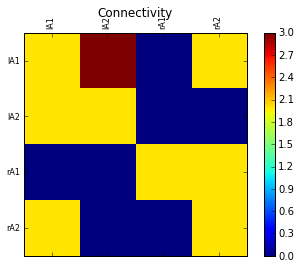

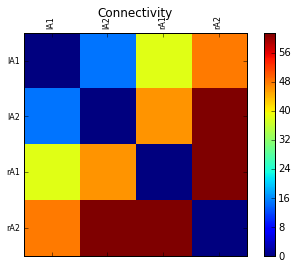

In [8]:
plot_connectivity(connectivity = conn_pau)

Multiple datasets in one
-------------------------

It is possible to reuse the majority of a dataset and have multiple pieces of 
data for one or more elements. That is, by default, when you create a Connectivity
object by pointing at a specific data directory, the data components are expected
to be in files with specific names, such as weights.txt.bz2. However, it is possible
for a specific connectivity data directory to contain multiple weights files as long
as they are consistent with the rest of the connectivity data. For example, in 
addition weights.txt.bz2 our directory may contain files named:

    weights_0.txt.bz2
    weights_bob.txt.bz2
    hfdbvaerut93483489.txt.bz2

thought that last one is a bad name as it's not clear what it contains.

The loading the connectivity specifying a particular weights would become:

    pau_path = os.path.join("connectivity", "paupau")
    conn_pau = connectivity.Connectivity(default = pau_path, weights_file = "weights_bob.txt.bz2")

A Larger Example Dataset
-------------------------

Load some more complicated data... to emphasise visualisation techniques

In [21]:
#Load the connectivity data in the directory tvb_data.connectivity.connectivity_190
conn_190 = connectivity.Connectivity.from_file("connectivity_192.zip")
#conn_190.default.reload(conn_190, os.path.join("connectivity", "o52r00_irp2008_hemisphere_both_subcortical_true_regions_190"))
#Configure, to compute derived data, such as number_of_nodes and delays
conn_190.configure()
conn_190.summary_info

{'Areas - Maximum': 10338.191999999999,
 'Areas - Mean': 1388.3227136979167,
 'Areas - Minimum': 0.0,
 'Number of connections': 3532,
 'Number of regions': 192,
 'Tract lengths - Max. non zero (connections)': 140.90183999999999,
 'Tract lengths - Maximum': 142.14580000000001,
 'Tract lengths - Mean': 36.147362114708116,
 'Tract lengths - Mean non zero': 59.040157598431549,
 'Tract lengths - Mean non zero (connections)': 56.479466730634208,
 'Tract lengths - Min. non zero': 5.9441609,
 'Tract lengths - Min. non zero (connections)': 0.0,
 'Tract lengths - Var. non zero': 316.99485152745626,
 'Tract lengths - Var. non zero (connections)': 448.59005218709859,
 'Tract lengths - Variance': 1021.5944036003615,
 'Undirected': 0,
 'Weights - Maximum': 3.0,
 'Weights - Mean': 0.18502728033085125,
 'Weights - Mean non zero': 1.9311567559786242,
 'Weights - Min. non zero': 0.0046263240999999998,
 'Weights - Var. non zero': 0.31225961251030004,
 'Weights - Variance': 0.35299969104959433}

Again, we can just take a look at a matrix plot of weights and tract lengths

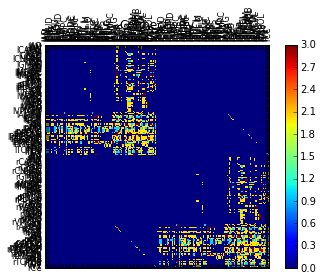

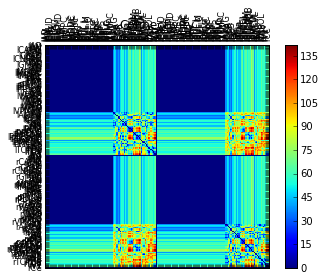

In [22]:
plot_connectivity(connectivity = conn_190)

Scaling, Transforming and Resampling
-------------------------------------

The Connectivity object includes a number of methods for scaling, transforming or resampling a connectivity.

**Scaling**
___________

Two simple types of scaling are supported and the ```scaling mode``` is the following: 
            
* **tract**: Scale by a value such that the maximum absolute value of a single connection is 1.
            
* **region**: Scale by a value such that the maximum absolute value of the cumulative input to any region is 1.

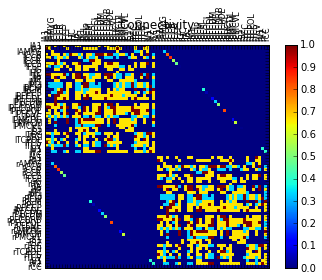

In [23]:
#Initialise a Connectivity object
orig_wm = connectivity.Connectivity(load_default=True)
orig_wm.configure()

scaled_wm = connectivity.Connectivity(load_default=True)
scaled_wm.configure()

#scale weights by the maximum aboslute value
scaled_wm.weights = orig_wm.scaled_weights(mode='tract')
plot_connectivity(scaled_wm, num="tract_mode", plot_tracts=False)

NOTE: Currently, multiple **tract** and/or **region** scalings without intermediate **none** scaling mode destroy the ability to recover the original un-scaled weights matrix.

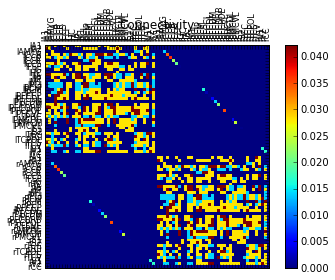

In [24]:
scaled_wm.weights = orig_wm.scaled_weights(mode='none')
scaled_wm.weights = orig_wm.scaled_weights(mode='region')
plot_connectivity(scaled_wm, num="region_mode", plot_tracts=False)

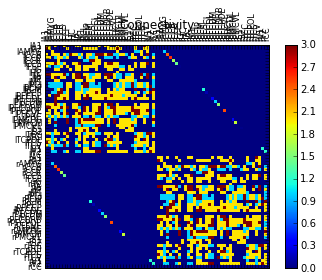

In [25]:
#undo scaling
scaled_wm.weights = orig_wm.scaled_weights(mode='none')
plot_connectivity(scaled_wm, num="default_mode", plot_tracts=False)

**Transforming**
_________________

These methods will affect either the topology or the distribution of the weights matrix. 

* **binarize matrix**: Sets all the non-zero values to 1. In other words it tyields the adjacency matrix.
* ** remove self-connections ** : Sets to zero all the elements of the main diagonal matrix.

NOTE: these methods do not provide a means to undo the changes


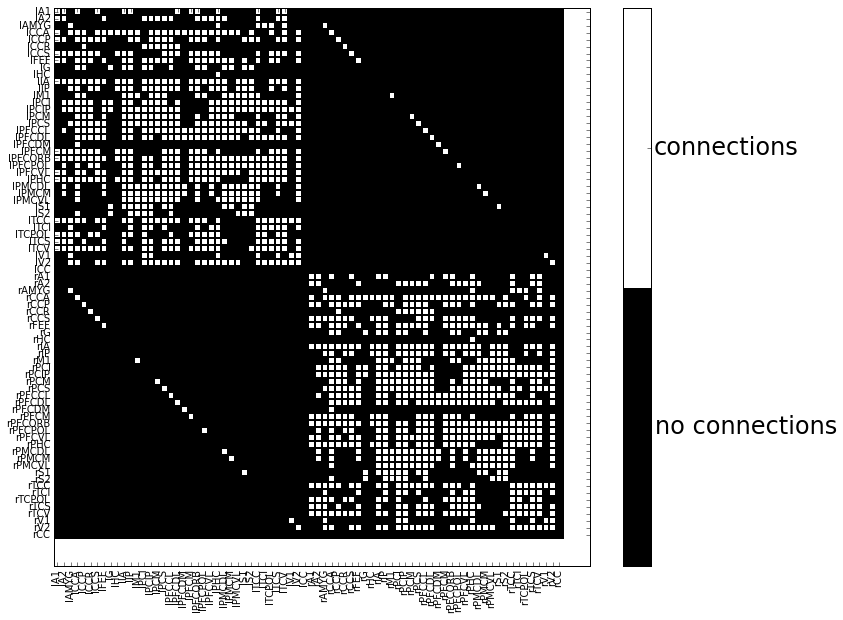

In [26]:
#binarize
scaled_wm.weights = orig_wm.transform_binarize_matrix()
plot_matrix(scaled_wm.weights, connectivity=scaled_wm, binary_matrix=True)


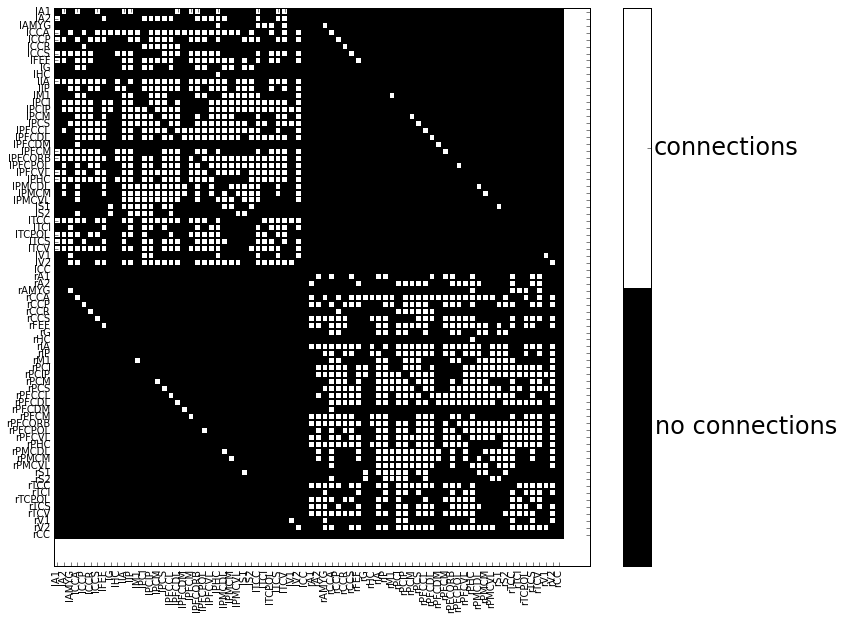

In [27]:
#binarize
scaled_wm.weights = scaled_wm.transform_remove_self_connections()
plot_matrix(scaled_wm.weights, connectivity=scaled_wm, binary_matrix=True)

In [28]:
from IPython.display import Image

Generating small connectivity architectures or motifs
-----------------------------------------------------

The connectivity datatypes include a number of methods to produce (preferably) small binary connectivity patterns.
Five different motifs are implemented:    

- linear_directed
- linear_undirected
- box_directed
- box_undirected
- all_to_all_undirecte

These methods will generate both ```weights``` and ```tract_lengths``` matrices with equidistant nodes. 
If you want to have a distribution of distances, it is possible to draw the centres from different geometry structures, most of them are smooth manifolds. 

The steps to create a 4 node conectivity matrix are the following:

In [29]:
# Define the number of regions and initialise a Connectivity object
nor = 4
wm = connectivity.Connectivity()

# Invoke the method to generate a default undirected chain with equidistant nodes and (x, y, z) positions drawn from a sphere.
wm.generate_surrogate_connectivity(nor)


In order to see the centres distribution we can generate a larger connectivity


In [30]:
nor = 100
wm.generate_surrogate_connectivity(nor)

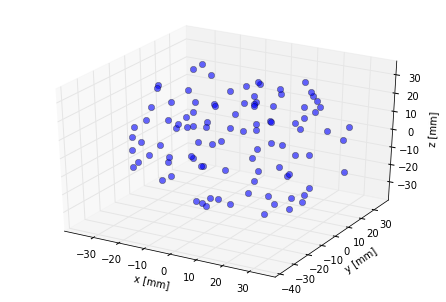

In [31]:
plot_3d_centres(wm.centres)

That's All Folks... so, what's next?
-------------------------------------

If you want to have more control about the type of coordinates and motifs, have a look at the demo ```generate_surrogate_connectivity.py
